In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset'

Test01.csv  THSARABUNNEW.TTF  Train01.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/Test01.csv',)
# df = pd.read_csv('/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/Train01.csv',)
df

Class                                               Text
0     negative  ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1      neutral                                   ครับ #phithanbkk
2     negative  การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3      neutral                              Cf clarins 5 ขวด 2850
4      neutral  ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...
...        ...                                                ...
2669  positive  เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...
2670   neutral  แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...
2671  positive                                          ไปเถอะดอม
2672   neutral          เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555
2673   neutral                                จัดสิค่ะ บาร์บีก้อน

[2674 rows x 2 columns]

In [ ]:
df_drop_question = df.drop(df[df['Class'] == 'question'].index)
df_drop_question

Class                                               Text
0     negative  ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1      neutral                                   ครับ #phithanbkk
2     negative  การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3      neutral                              Cf clarins 5 ขวด 2850
4      neutral  ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...
...        ...                                                ...
2669  positive  เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...
2670   neutral  แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...
2671  positive                                          ไปเถอะดอม
2672   neutral          เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555
2673   neutral                                จัดสิค่ะ บาร์บีก้อน

[2617 rows x 2 columns]

In [ ]:
text_array = df_drop_question['Text'].values
text_array

array(['ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไม่ได้',
       'ครับ #phithanbkk',
       'การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเอส (รถไฟฟ้า) มันสำนึกมั้ย ก็ไม่อ่ะ 😕',
       ..., 'ไปเถอะดอม', 'เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555',
       'จัดสิค่ะ บาร์บีก้อน'], dtype=object)

In [ ]:
text_array[0]

'ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไม่ได้'

In [ ]:
# !pip install emoji

In [ ]:
# https://lengyi.medium.com/twitterio-1-thai-text-cleansing-regular-expression-python-abe985b773b4
import re
import string
# import emoji

remove_emoji_list = []
# Define emoji pattern
emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   "]+", flags = re.UNICODE) #Flag option as Unicode


# text_array = ''.join([c for c in text_array if c not in emoji.UNICODE_EMOJI])
for i,text in enumerate(text_array[:]):
  # print(i)
  # print(text)
  remove_emoji = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text)
  # Remove emoji
  remove_emoji = re.sub(emoji, '', remove_emoji)


  remove_emoji = re.sub("[><#@/:%&฿()]","",remove_emoji)
  remove_emoji = re.sub("[+*_=!~`,.-^-]","",remove_emoji)
  remove_emoji = re.sub("[...]","",remove_emoji)
  remove_emoji = re.sub("[--]","",remove_emoji)
  remove_emoji = remove_emoji.replace('...', '')
  remove_emoji = remove_emoji.replace('!!', '')

  remove_emoji = re.sub("[0123456789]","",remove_emoji)
  remove_emoji = re.sub("[A-Z]","",remove_emoji)
  remove_emoji = re.sub("[a-z]","",remove_emoji)
  remove_emoji = re.sub("[a-zA-Z0-9-_*.™É`^,’]", "", remove_emoji)

  remove_emoji_list.append(remove_emoji)

print(remove_emoji_list)

['ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไม่ได้', 'ครับ ', 'การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเอส รถไฟฟ้า มันสำนึกมั้ย ก็ไม่อ่ะ ', '   ขวด ', 'ทานได้ค่ะ น้ำซุป  ต้มมาจากหัวผักกาด ซีอิ้วขาว เกลือ แลน้ำตาลค่ะ', 'เคล็ดลับที่ขาดไม่ได้ในการป้องกันผิวจากแสงแดด คือการทาครีมกันแดด สาวๆบ้างคนอาจจะคิดว่ามันไม่ใช่เรื่องสำคัญเท่าไหร่ แต่บอกเลยว่า ผิดมาก เพราะแสงแดดสมัยนี้แรงมาก และมีอนุภาพการทำลายผิวสูงมาก ถ้าไม่อยากให้ผิวเราถูกทำร้ายแบบซ้ำๆซาก ควรทาครีมกันแดดที่ดีมีคุณภาพอย่าง      ปัจจุบันครีมกันแดดมีมากมายให้เราเลือกซื้อก็จริง แต่ก็อย่าลืมเลือกสิ่งที่ดีที่สุดให้ตัวเราอย่าง      ค่ะ', "สำหรับสูตรของผม คือ  ' หวานซ่อนเปรี้ยวชื่อ    ส่วนประกอบ  '  ชอท น้ำเก๊กฮวย น้ำมะนาว ใบมิ้นท์ เกลือเล็กน้อย วิธีปรุง นำ ' มาเขย่ากับน้ำเก๊กฮวย เจือด้วยน้ำมะนาวบางๆ ตกแต่งด้วยใบมิ้น เสริฟด้วยแก้วที่ทาเกลือไว้ที่ปากแก้ว รสชาติที่จะได้คือหวาน หอม ซ่อนเปรี้ยว ด้วยคอนเซ็ปว่านี่แหละคือชีวิต จะหวานอย่างเดียวก็จะเลี่ยนไป จะเปรี้ยวเกินไปก็ไม่ใช่เรื่อง จึงควรจะมีทั้งเปรี้ยว ทั้งหวานคละเคล้ากันไปครับ", 'เจ้ว

In [ ]:
remove_emoji_list[0]

'ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไม่ได้'

In [ ]:
df_drop_Emoji = df_drop_question
df_drop_Emoji['Text'] = remove_emoji_list
df_drop_Emoji

Class                                               Text
0     negative  ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1      neutral                                              ครับ 
2     negative  การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3      neutral                                               ขวด 
4      neutral  ทานได้ค่ะ น้ำซุป  ต้มมาจากหัวผักกาด ซีอิ้วขาว ...
...        ...                                                ...
2669  positive  เล็กลงมา แต่ดีเท่าเดิม  แวะมาหาได้ที่เซเว่นน๊า...
2670   neutral  แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...
2671  positive                                          ไปเถอะดอม
2672   neutral                      เจมส์ บอนด์ ขับโตโยต้าอัลติส 
2673   neutral                                จัดสิค่ะ บาร์บีก้อน

[2617 rows x 2 columns]

In [ ]:
!pip install pythainlp

In [ ]:
from pythainlp import word_tokenize #ตัดคำไทย
from pythainlp.util import normalize #ที่เรียงผิดหรือใช้ผิดอักษร เช่น "แ" พิมพ์เป็น "เ เ" หรือ "ต้้้้น"
from pythainlp.util import eng_to_thai #ข้อความที่ไม่ได้สลับแป้นพิมพ์
from pythainlp.corpus.common import thai_stopwords #ลบคำฟุ่มเฟือยภาษาไทย
thai_stopwords = list(thai_stopwords())

def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)

    final = normalize(final)
    final = eng_to_thai(final)


    return final

In [ ]:
df_Clear = df_drop_Emoji
df_Clear['Text'] = df_drop_Emoji['Text'].apply(text_process)
df_Clear

Class                                               Text
0     negative  ซื้อ แต่ ผ้าอนามัย แบบ เย็น มา ค่ะ แบบ ว่า อี ...
1      neutral                                               ครับ
2     negative  การ ด่า ไป เหมือน ได้ บรรเทา ความเครียด เฉย แต...
3      neutral                                                ขวด
4      neutral  ทาน ได้ ค่ะ น้ำ ซุป ต้ม มาจาก หัวผักกาด ซีอิ้ว...
...        ...                                                ...
2669  positive  เล็ก ลงมา แต่ ดี เท่าเดิม แวะ มาหา ได้ที่ เซเว...
2670   neutral  แพนด้า ซิ่ง กับ มุมมอง ที่ แตกต่าง อย่าง ลงตัว...
2671  positive                                        ไป เถอะ ดอม
2672   neutral                     เจมส์ บอนด์ ขับ โตโยต้า อัลติส
2673   neutral                            จัด สิ ค่ะ บาร์ บี ก้อน

[2617 rows x 2 columns]

In [ ]:
# drop rows that contain NaN values
df_Clear['Text'].replace('', np.nan, inplace=True)
df_Clear = df_Clear.dropna()
df_Clear

Class                                               Text
0     negative  ซื้อ แต่ ผ้าอนามัย แบบ เย็น มา ค่ะ แบบ ว่า อี ...
1      neutral                                               ครับ
2     negative  การ ด่า ไป เหมือน ได้ บรรเทา ความเครียด เฉย แต...
3      neutral                                                ขวด
4      neutral  ทาน ได้ ค่ะ น้ำ ซุป ต้ม มาจาก หัวผักกาด ซีอิ้ว...
...        ...                                                ...
2669  positive  เล็ก ลงมา แต่ ดี เท่าเดิม แวะ มาหา ได้ที่ เซเว...
2670   neutral  แพนด้า ซิ่ง กับ มุมมอง ที่ แตกต่าง อย่าง ลงตัว...
2671  positive                                        ไป เถอะ ดอม
2672   neutral                     เจมส์ บอนด์ ขับ โตโยต้า อัลติส
2673   neutral                            จัด สิ ค่ะ บาร์ บี ก้อน

[2589 rows x 2 columns]

In [ ]:
df_Clear['Text'].iloc[[2566]].values

array(['กู คุม งาน ปู กระเบื้อง พื้น ค่าจ้าง หมื่น กว่า บาท ผู้รับจ้าง จะ ให้ เหล้า หงษ์ ทอง กู ขวด นึง เป็น เป็น น้ำใจ ที่ จ้าง เขา กู ยัง ไม่ กล้า รับ เลย กู กลัว สต ง ตรวจสอบ'],
      dtype=object)

In [ ]:
# filepath_train = '/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/Train01_Clear.csv'
# df_Clear.to_csv(filepath_train)

filepath_test = '/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/Test01_Clear.csv'
df_Clear.to_csv(filepath_test)

In [ ]:
# # pip install clean-text

# from cleantext import clean
# #provide string with emojis
# text = "This sample text contains laughing emojis 😀 😃 😄 😁 😆 😅 😂 🤣"

# #print text after removing the emojis from it
# print(clean(text, no_emoji=True))

Train:
 neutral     12928
negative     6116
positive     4247
Name: Class, dtype: int64
Axes(0.125,0.11;0.775x0.77)
--------------


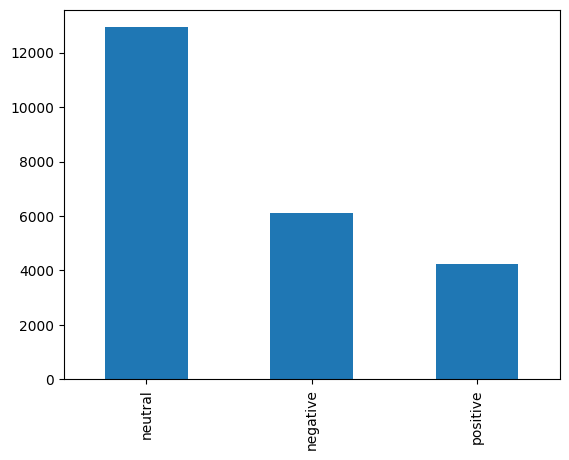

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/Train01_Clear.csv',)
print('Train:\n', df_train['Class'].value_counts())
print(df_train['Class'].value_counts().plot.bar())
print('--------------')

In [ ]:
df_train

Unnamed: 0     Class                                               Text
0               0   neutral  ประเทศ เรา ผลิต และ ส่งออก ยาสูบ เยอะ สุด ใน โ...
1               1   neutral                                                 คะ
2               2  negative                อิ เหี้ย ออม ทำ กู อยาก กิน เอ็ม เค
3               4   neutral                         สวัสดี วัน พุธ แนน อะไร นะ
4               5   neutral  ก้อน ขอบพระคุณ มาก นะ คร้าบ ที่ มาหา ก้อน และ ...
...           ...       ...                                                ...
23286       24058  negative                                 แม่ ง ควาย ล้วน นน
23287       24059  negative                   ดอย สุเทพ น้อง ง ไป หมด แล้ว ววว
23288       24060  negative                      ค่า ชุด อาจจะ แพง กว่า ส่วนลด
23289       24061   neutral                          รัฐ ต้องการ แค่ ภาษี ครับ
23290       24062   neutral  ได้ พัฒนา ระบบ เข้าสู่ รุ่น ที่สอง แล้ว มา ดู ...

[23291 rows x 3 columns]

In [ ]:
# df_neutral = df_train[df_train['Class'] == 'neutral']
# df_neutral

ประเทศ เรา ผลิต และ ส่งออก ยาสูบ เยอะ สุด ใน โลก จิง ป่าว คับ คะ สวัสดี วัน พุธ แนน อะไร นะ ก้อน ขอบ


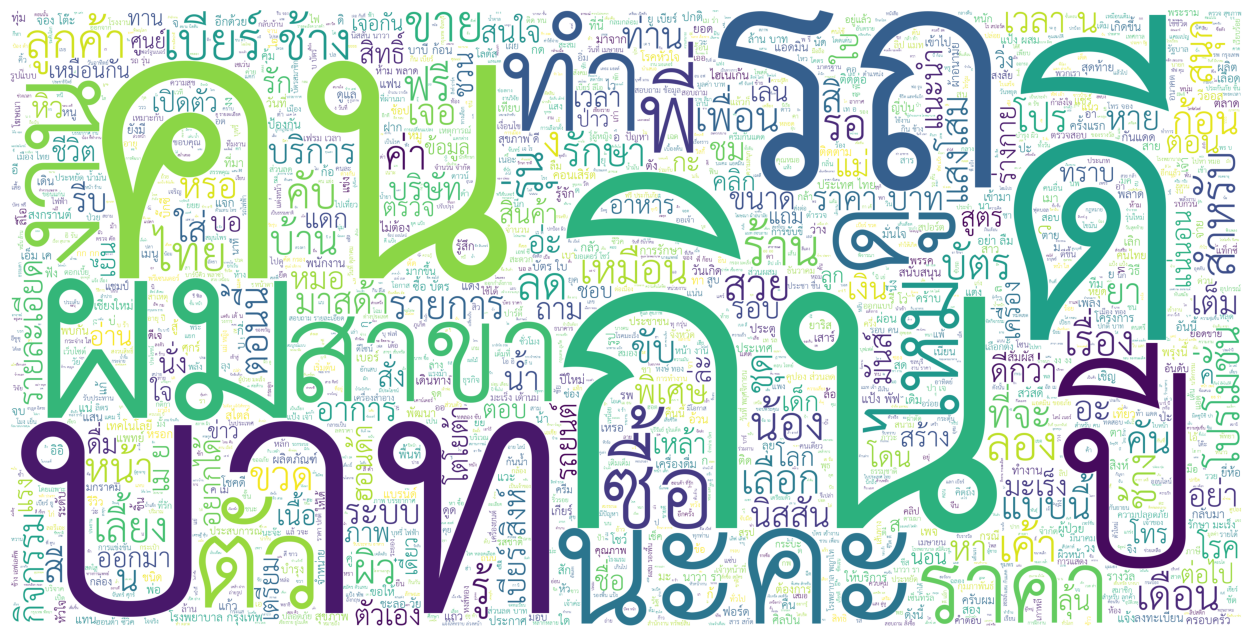

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from pythainlp.corpus.common import thai_stopwords

thai_stopwords = list(thai_stopwords())
# thai_stopwords

df_neutral = df_train[df_train['Class'] == 'neutral']
pos_word_all = " ".join(str(text) for text in df_neutral['Text'])
print(pos_word_all[:100])

reg = r"[ก-๙a-zA-Z']+"
fp = '/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/THSARABUNNEW.TTF'

# wc = WordCloud(stopwords=thai_stopwords, font_path=fp, regexp=reg).generate(pos_word_all)
# plt.imshow(wc)
# wordcloud = WordCloud(stopwords=thai_stopwords, background_color="white").generate(pos_word_all)
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

อิ เหี้ย ออม ทำ กู อยาก กิน เอ็ม เค เน็ต ควาย มาก กู พูด จริง เสียดาย ตังค์ ที่ ติดตั้ง เน็ต โค รต ห


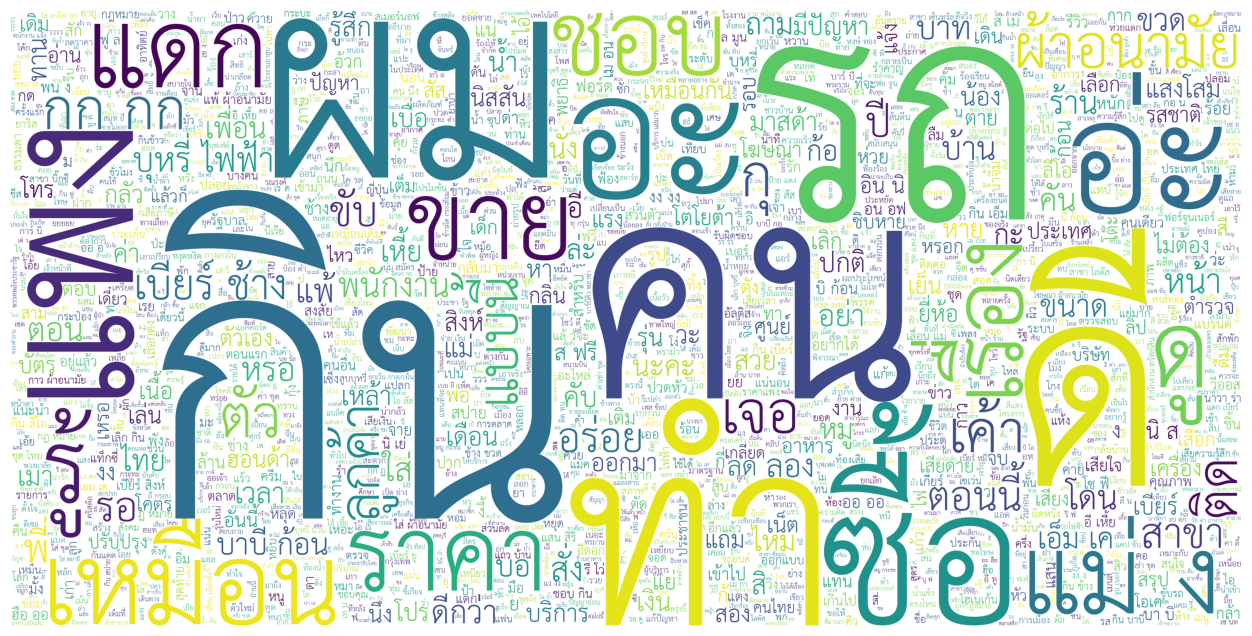

In [ ]:
df_negative = df_train[df_train['Class'] == 'negative']
pos_word_all = " ".join(str(text) for text in df_negative['Text'])
print(pos_word_all[:100])

reg = r"[ก-๙a-zA-Z']+"
fp = '/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/THSARABUNNEW.TTF'

# wc = WordCloud(stopwords=thai_stopwords, font_path=fp, regexp=reg).generate(pos_word_all)
# plt.imshow(wc)
# wordcloud = WordCloud(stopwords=thai_stopwords, background_color="white").generate(pos_word_all)
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

สนใจ ฟอ จูน เนอร์ สี ขาว ครับ ไป ดิ รอ ไร อยาก กิน บาบี ก้อน หรอ ต้อง ไป ลอง กัน นะ ขอให้ มี กิจการ 


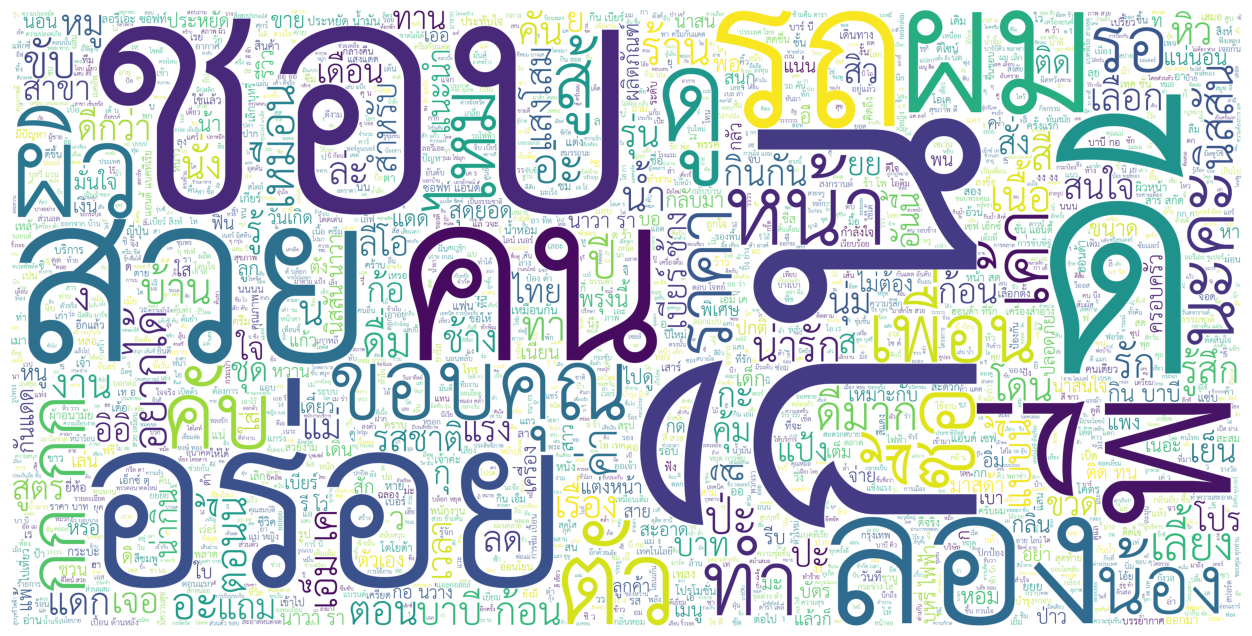

In [ ]:
df_positive = df_train[df_train['Class'] == 'positive']
pos_word_all = " ".join(str(text) for text in df_positive['Text'])
print(pos_word_all[:100])

reg = r"[ก-๙a-zA-Z']+"
fp = '/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/THSARABUNNEW.TTF'

# wc = WordCloud(stopwords=thai_stopwords, font_path=fp, regexp=reg).generate(pos_word_all)
# plt.imshow(wc)
# wordcloud = WordCloud(stopwords=thai_stopwords, background_color="white").generate(pos_word_all)
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Test:
 neutral     1437
negative     681
positive     471
Name: Class, dtype: int64
Axes(0.125,0.11;0.775x0.77)


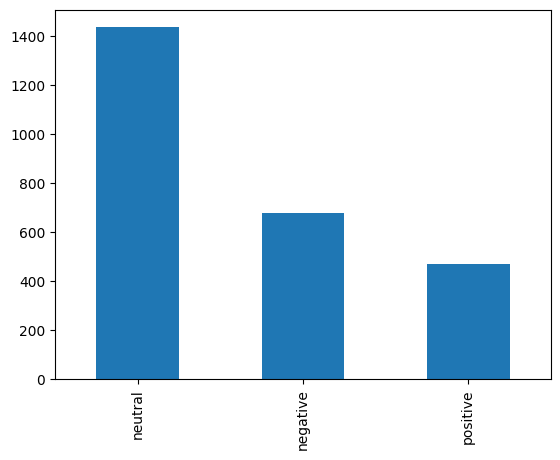

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Thai NLP sentiment analysis/Dataset/Test01_Clear.csv',)
print('Test:\n', df_test['Class'].value_counts())
print(df_test['Class'].value_counts().plot.bar())

In [ ]:
df_test

Unnamed: 0     Class                                               Text
0              0  negative  ซื้อ แต่ ผ้าอนามัย แบบ เย็น มา ค่ะ แบบ ว่า อี ...
1              1   neutral                                               ครับ
2              2  negative  การ ด่า ไป เหมือน ได้ บรรเทา ความเครียด เฉย แต...
3              3   neutral                                                ขวด
4              4   neutral  ทาน ได้ ค่ะ น้ำ ซุป ต้ม มาจาก หัวผักกาด ซีอิ้ว...
...          ...       ...                                                ...
2584        2669  positive  เล็ก ลงมา แต่ ดี เท่าเดิม แวะ มาหา ได้ที่ เซเว...
2585        2670   neutral  แพนด้า ซิ่ง กับ มุมมอง ที่ แตกต่าง อย่าง ลงตัว...
2586        2671  positive                                        ไป เถอะ ดอม
2587        2672   neutral                     เจมส์ บอนด์ ขับ โตโยต้า อัลติส
2588        2673   neutral                            จัด สิ ค่ะ บาร์ บี ก้อน

[2589 rows x 3 columns]